# Age Group Inference Threshold Analysis

In [70]:
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm, tqdm_notebook
import nafot
from geopy.distance import vincenty
from matplotlib import pyplot as plt
%matplotlib inline

## Load data

### Location data - grouped by imsi

In [290]:
imsi_df_sm00 = pd.read_csv('../../Data/new_samples/children_imsi/imsi_dfs/imsi_df_sm00.csv')
imsi_df_sm01 = pd.read_csv('../../Data/new_samples/children_imsi/imsi_dfs/imsi_df_sm01.csv')
imsi_df = pd.concat([imsi_df_sm00, imsi_df_sm01])

### Children imsi data

In [291]:
# Thresholds to check
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

imsi_by_thresholds_sm00 = np.load('../../Data/new_samples/children_imsi/thershold_all_sm00.npy')
imsi_by_thresholds_sm01 = np.load('../../Data/new_samples/children_imsi/thershold_all_sm01.npy')

imsi_by_thresholds = [np.append(imsi_by_thresholds_sm00[i], imsi_by_thresholds_sm01[i]) for i in range(len(thresholds))]

sizes = [len(im_list) for im_list in imsi_by_thresholds]

In [310]:
with open('../../Data/new_samples/children_imsi/sample_00_500_m.pickle','rb') as pickle_in:
    sm00_500 = pickle.load(pickle_in)
    
imsi_by_thresholdssm_00_500 = np.hstack(sm00_500)

### Plot children age group proportion 

In [292]:
children_prop = []
adult_prop = []

for thresh in thresholds:
    children_prop.append(imsi_df[f'age_group_{thresh}'].sum() / imsi_df.shape[0])
    adult_prop.append((imsi_df.shape[0] - imsi_df[f'age_group_{thresh}'].sum()) / imsi_df.shape[0]) 

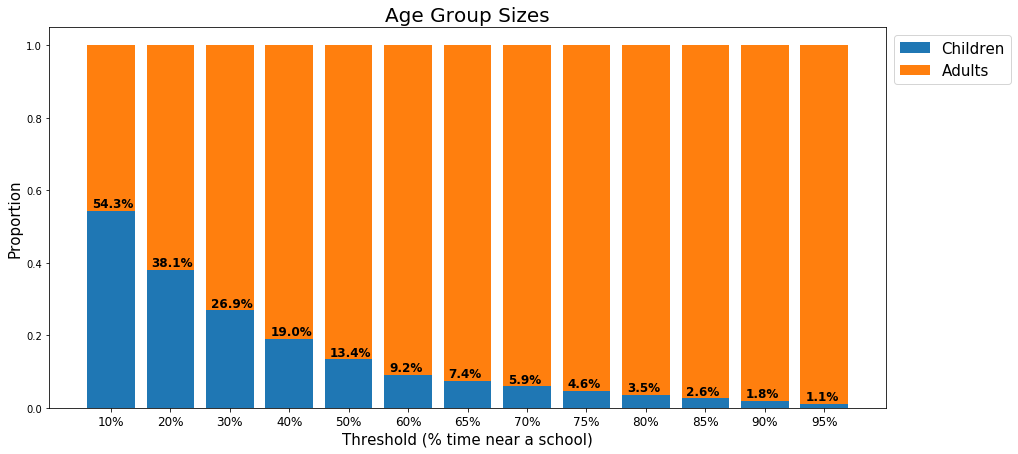

In [295]:
plt.figure(figsize=(15,7))

width = 0.05
plt.bar(np.arange(len(thresholds)), children_prop, label='Children')#, width=width)
plt.bar(np.arange(len(thresholds)), adult_prop, bottom=children_prop, label='Adults')#, width=width)
for i in np.arange(len(thresholds)):
    plt.text(i-0.32, children_prop[i]+0.01, f'{children_prop[i]*100:.1f}%', fontdict={'fontsize': 12, 'fontweight': 'bold'})

plt.title('Age Group Sizes', size=20)
plt.ylabel('Proportion', size=15)
plt.xlabel('Threshold (% time near a school)', size=15)

plt.xticks(np.arange(len(thresholds)), [f'{thresh*100:.0f}%' for thresh in thresholds], size=12)
# plt.ylim([0,1.15])

plt.legend(fontsize=15, bbox_to_anchor=(1,1))

plt.show()

### Plot average and max distance by threshold 

In [296]:
avg_distances = []
max_distances = []

for thresh in thresholds:
    avg_dist = imsi_df.groupby(f'age_group_{thresh}')['avg_dist_from_home'].mean()
    max_dist = imsi_df.groupby(f'age_group_{thresh}')['max_dist_from_home'].mean()
    
    avg_distances.append(avg_dist.loc[False] - avg_dist.loc[True])
    max_distances.append(max_dist.loc[False] - max_dist.loc[True])

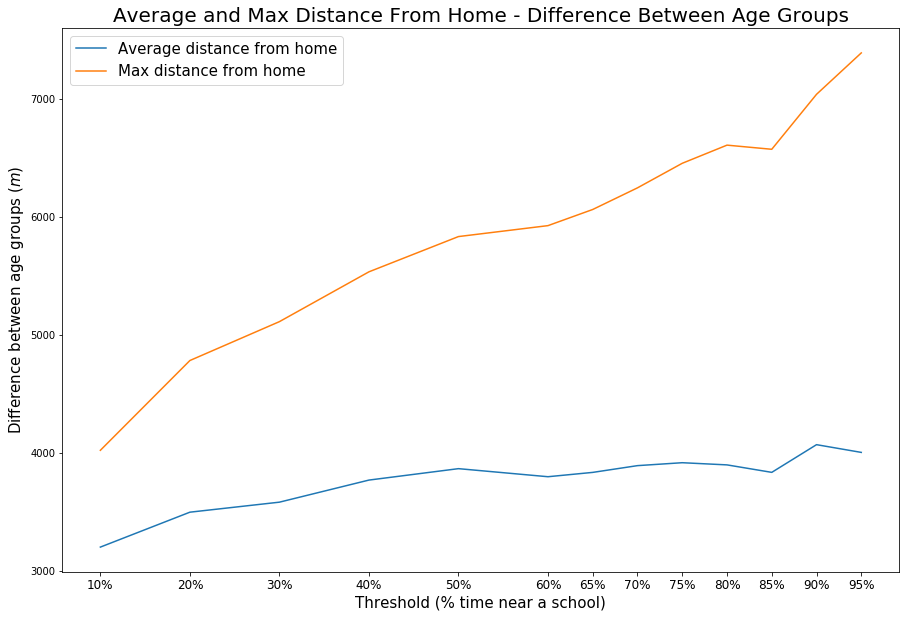

In [297]:
plt.figure(figsize=(15,10))
plt.plot(thresholds, avg_distances, label='Average distance from home')
plt.plot(thresholds, max_distances, label='Max distance from home')

plt.title('Average and Max Distance From Home - Difference Between Age Groups', size=20)
plt.ylabel('Difference between age groups ($m$)', size=15)
plt.xlabel('Threshold (% time near a school)', size=15)

plt.xticks(thresholds, [f'{thresh*100:.0f}%' for thresh in thresholds], size=12)
# plt.ylim([0,7300])

plt.legend(fontsize=15)
plt.show()

# Pre-processing

## Children imsi

In [225]:
# list of thresholds to check
thresholds1 = [0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9]
thresholds2 = [0.1, 0.2, 0.3, 0.4, 0.65]
thresholds3 = [0.95]
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

# Get children imsi list by threshold
#Sample 00
with open('../../Data/new_samples/children_imsi/thresholds_all_results.pickle','rb') as pickle_in:
    children_imsi_by_thresholds1 = pickle.load(pickle_in)

with open('../../Data/new_samples/children_imsi/thresholds_all_results_part2.pickle.','rb') as pickle_in:
    children_imsi_by_thresholds2 = pickle.load(pickle_in)
    
with open('../../Data/new_samples/children_imsi/thresholds_all_results_part3.pickle.','rb') as pickle_in:
    children_imsi_by_thresholds3 = pickle.load(pickle_in)

# Sample 01
with open('../../Data/new_samples/children_imsi/thresholds_all_results_sm01.pickle.','rb') as pickle_in:
    children_imsi_by_thresholds_sm01 = pickle.load(pickle_in)


imsi_by_thresholds1 = [np.hstack(ch_imsi) for ch_imsi in children_imsi_by_thresholds1]
imsi_by_thresholds2 = [np.hstack(ch_imsi) for ch_imsi in children_imsi_by_thresholds2]
imsi_by_thresholds3 = [np.hstack(ch_imsi) for ch_imsi in children_imsi_by_thresholds3]
imsi_by_thresholds_sm01 = [np.hstack(ch_imsi) for ch_imsi in children_imsi_by_thresholds_sm01]


imsi_by_thresholds = imsi_by_thresholds2[:-1]+imsi_by_thresholds1[:2]+imsi_by_thresholds2[-1:]+imsi_by_thresholds1[2:]+imsi_by_thresholds3

sizes = [len(im_list) for im_list in imsi_by_thresholds]

In [182]:
thresholds2[:-1]+thresholds1[:2]+thresholds2[-1:]+thresholds1[2:]+thresholds3

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

In [229]:
# np.save('../../Data/new_samples/children_imsi/thershold_all_sm00.npy', imsi_by_thresholds)
# np.save('../../Data/new_samples/children_imsi/thershold_all_sm01.npy', imsi_by_thresholds_sm01)

## Location data

In [26]:
gdf = nafot.gdf.copy()

In [219]:
loc_data = pd.read_csv('../../Data/new_samples/with_stat_area/sample_01with_stat.csv')

# Remove records without stat area
loc_data.dropna(inplace=True)

In [220]:
# Get home data
home_data = pd.read_csv('../../Data/new_samples/home_area/home_area_data_all_updated.csv')    
home_data.set_index('imsi', inplace=True)
home_data.home_stat_area = home_data.home_stat_area.apply(lambda x: float(x) if x != 'NotDetermined' else x)

# Adding the centroid of the home stat_area
home_data = home_data.merge(pd.DataFrame(gdf.geometry.centroid), how='left', left_on='home_stat_area', right_index=True)
home_data.columns = ['home_stat_area', 'home_center']

# Add home stat area and center columns
loc_data = loc_data.merge(home_data, how='left', left_on='imsi', right_index=True)

# Remove users without home stat area
loc_data = loc_data[loc_data.home_stat_area != 'NotDetermined'].copy()

Get only data in weekdays

In [221]:
weekends_dates = ['2012-11-30', '2012-12-01', '2012-12-07', '2012-12-08', '2012-12-14', '2012-12-15', '2012-12-21',
                  '2012-12-22', '2012-12-28', '2012-12-29', '2013-01-04', '2013-01-05', '2013-01-11', '2013-01-12',
                  '2013-01-18', '2013-01-19', '2013-01-25', '2013-01-26' '2013-02-01', '2013-02-02']

loc_data_week = loc_data[~loc_data.date_stamp.isin(weekends_dates)].copy()

In [222]:
def get_dist_from_home(row):
    if not np.isnan(row.home_center).any():
        return vincenty((row.latitude, row.longtitude), (row.home_center.y, row.home_center.x)).meters

In [223]:
tqdm_notebook().pandas()
loc_data_week['dist_from_home'] = loc_data_week.progress_apply(get_dist_from_home, axis=1)

A Jupyter Widget

A Jupyter Widget

In [224]:
loc_data_week.to_csv('../../Data/new_samples/children_imsi/imsi_dfs/loc_data_week_sm01.csv', index=False)

## Location Data - Group by imsi

Create imsi df

In [278]:
gb_imsi = loc_data_week.groupby('imsi')

# Count the number of distinct stat_areas
imsi_df = gb_imsi[['stat_area_id']].nunique()
imsi_df.columns = ['distinct_stat_areas']


# Add average distance from home per day
imsi_df['avg_dist_from_home'] = loc_data_week.groupby(['imsi', 'date_stamp'])\
                                                        [['dist_from_home']].mean().reset_index().groupby('imsi').mean()

# Add average of max distance from home
imsi_df['max_dist_from_home'] = loc_data_week.groupby(['imsi', 'date_stamp'])\
                                                        [['dist_from_home']].max().reset_index().groupby('imsi').mean()

Add age group by threshold

In [285]:
# True if the user is near a school > threshold of the time 
for i in range(len(thresholds)):
    imsi_df[f'age_group_{thresholds[i]}'] = imsi_df.index.isin(imsi_by_thresholds_sm01[i])

In [287]:
# imsi_df.to_csv('../../Data/new_samples/children_imsi/imsi_dfs/imsi_df_sm01.csv')